<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle-01-numpy-and-matplotlib-iris-Nini01Fz/blob/main/notebooks/controle_numpy_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contrôle 01 — Data Science avec NumPy et Matplotlib
**Master 1 — Intelligence Artificielle & Génie Informatique (FPK / USMS)**

Nom & Prénom :Nini Fatima ezzahra  
Filière :SIIA  
Année universitaire :2025/2026

---

**Règles :**
- Bibliothèques autorisées : NumPy, Matplotlib
- Toute autre bibliothèque est interdite
- Chaque question doit être traitée dans une cellule dédiée
- Chaque résultat doit être brièvement interprété


# Partie A — Importation du Dataset, Arrays, Premières Manipulations

### A1. Importation du dataset
Importez NumPy et Matplotlib.  
Chargez le fichier `iris.csv` avec `np.genfromtxt` (`delimiter=','`, `skip_header=1`).  
Stockez les données dans un array nommé `data` et affichez sa `shape`.


In [6]:
# Chargement du dataset Iris et affichage de sa dimension

import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt(
    "Iris.csv",
    delimiter=",",
    skip_header=1,
    dtype=None,
    encoding="utf-8"
)

print(data.shape)
print(data[0])
#inspecter les noms des colonnes
print(data.dtype.names)

(150,)
(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa')
('f0', 'f1', 'f2', 'f3', 'f4', 'f5')


**Le dataset contient une variable catégorielle, NumPy charge donc les données sous forme de tableau structuré.**

Nous chargeons le dataset Iris à partir du fichier **csv** en utilisant NumPy, puis nous affichons sa dimension afin de vérifier le nombre d’observations et de variables.
:

### A2. Séparation des features et des espèces
Séparez :
- les 4 premières colonnes numériques dans un array `features`
- la dernière colonne (espèces) dans un array `species`
Utilisez le slicing.


In [7]:
# Les 4 premières colonnes
features = np.column_stack((
    data['f1'],
    data['f2'],
    data['f3'],
    data['f4']
))
print(features.shape)
#La dernière colonne espèces
species = data['f5']
print(np.unique(species))

(150, 4)
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**Les variables numériques ont été regroupées dans une matrice features de dimension (150, 4).**

**La variable catégorielle species a été extraite séparément afin de permettre l’utilisation de masques booléens.**

### A3. Indexing
Affichez les 5 premières lignes de `features` en utilisant l’indexing.


In [8]:
# affichage des 5 premieres lignes
print(features[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### A4. Extraction d’une colonne
Créez un array `sepal_length` contenant uniquement la première colonne de `features`.  
Affichez sa `size` et son `dtype`.


In [9]:
# creation de l'array sepal length contenant la 1ere colonne
sepal_length = features[:, 0]
#affichage de size
print(sepal_length.size)
print('\n')
#affichage de son dtype
print(sepal_length.dtype)

150


float64


### A5. Slicing par espèce
Utilisez le slicing pour extraire les 50 premières lignes correspondant à l’espèce *Setosa*.  
Stockez-les dans `setosa_features`.


In [10]:
# extraction des 50 premieres lignes  correspondant à l’espèce Setosa.
setosa_features = features[:50]
print(setosa_features.shape)

(50, 4)


# Partie B — Statistiques Basiques et Opérations Mathématiques

### B6. Moyenne par colonne
Calculez la moyenne de chaque colonne de `features` avec `np.mean(axis=0)`.


In [11]:
# caclul de la moyenne de chaque colonne de features
mean = np.mean(features, axis=0)
print(mean)

[5.84333333 3.054      3.75866667 1.19866667]


### B7. Min et Max
Trouvez la valeur minimale et maximale de la longueur des pétales.


In [12]:
# Valeur minimale
min = np.min(features[:,2:3])
print(min)
print('\n')
# Valeur maximale
max = np.max(features[:,2:3])
print(max)

1.0


6.9


### B9. Normalisation
Normalisez les longueurs des pétales en les divisant par leur maximum.
Stockez le résultat dans `normalized_petals`.


In [13]:
# normalisation
normalized_petals = features[:,2]/max
print(normalized_petals[:5])

[0.20289855 0.20289855 0.1884058  0.2173913  0.20289855]


### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [14]:
# somme cumulative
#creatin du mask versicolor
versicolor_mask = (species == 'Iris-versicolor')

# Extraction des largeurs des pétales pour Versicolor
petal_width_versicolor = features[versicolor_mask, 3]

# Calcul de la somme cumulée
cum_sum = np.cumsum(petal_width_versicolor)
print(cum_sum[:10])

[ 1.4  2.9  4.4  5.7  7.2  8.5 10.1 11.1 12.4 13.8]


### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [15]:
# somme cumulative
#creatin du mask versicolor
versicolor_mask = (species == 'Iris-versicolor')

# Extraction des largeurs des pétales pour Versicolor
petal_width_versicolor = features[versicolor_mask, 3]

# Calcul de la somme cumulée
cum_sum = np.cumsum(petal_width_versicolor)
print(cum_sum[:10])

[ 1.4  2.9  4.4  5.7  7.2  8.5 10.1 11.1 12.4 13.8]


# Partie C — Transformations Avancées avec NumPy

### C11. Espèces uniques
Listez les espèces uniques avec `np.unique` et comptez leurs occurrences.


In [16]:
# Espèces uniques et comptage des occurrences
unique_species,  occ = np.unique(species, return_counts=True)
print("especes uniques :", unique_species)
print("occurences :", occ)

especes uniques : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
occurences : [50 50 50]


### C12. Reshape par espèce
Transformez `features` en un array de forme `(3, 50, 4)` nommé `features_by_species`.


In [17]:
# Reshape des features par espece
features_by_species = np.reshape(features, (3,50,4))
print(features_by_species.shape)

(3, 50, 4)


### C13. Concaténation
Concaténez horizontalement les moyennes par colonne avec un array de zéros.


In [18]:
# Création d'un array de zéros
zeros_array = np.zeros(mean.shape)

# Concatenation horizontale
con_array = np.hstack((mean, zeros_array))
print(con_array)

[5.84333333 3.054      3.75866667 1.19866667 0.         0.
 0.         0.        ]


### C14. Data cleaning (simulation)
Simulez des valeurs NaN et remplacez-les avec `np.nan_to_num`.


In [19]:
# Copie des données pour la simulation
features_nan = features.copy()

# Simulation de valeurs manquantes
features_nan[0, 0] = np.nan
features_nan[5, 3] = np.nan
features_nan[9, 0] = np.nan

# Maintenant remplacement des NaN par 0
clean_features = np.nan_to_num(features_nan)
print(clean_features[:10])


[[0.  3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0. ]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [0.  3.1 1.5 0.1]]


### C15. Broadcasting
Ajoutez 1 à toutes les valeurs de la première colonne de `features`.


In [20]:
# Ajout de 1 à la première colonne
features_1 = features.copy()
features_1[:, 0] = features_1[:, 0] + 1
print(features_1[:5, 0])


[6.1 5.9 5.7 5.6 6. ]


### C16. np.where
Créez un array binaire indiquant si la longueur des pétales est supérieure à 4.0.


In [21]:
# Création de l'array binaire
petal_length = features[:, 2]
bin_array = np.where(petal_length > 4.0, 1, 0)
print(bin_array[:10])

[0 0 0 0 0 0 0 0 0 0]


**Un tableau binaire a été créé à l’aide de np.where afin d’indiquer si la longueur des pétales est supérieure à 4.0. La valeur 1 correspond à une longueur supérieure au seuil, et 0 sinon.**

# Partie D — Visualisation avec Matplotlib (Plots Simples)

### D17. Line plot
Line plot des longueurs des sépales pour les 50 premières fleurs.


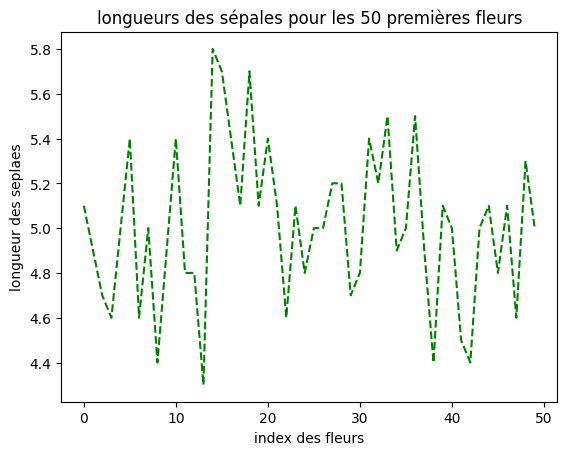

In [43]:
# Extraction de la longueur des sepales pour les 50 premieres fleurs
sepal_length50 = features[:50, 0]
#creation du line plot
plt.plot(sepal_length50, c='green', linestyle='dashed')
plt.xlabel('index des fleurs')
plt.ylabel('longueur des seplaes')
plt.title('longueurs des sépales pour les 50 premières fleurs')
plt.show()

### D18. Scatter plot
Scatter plot : longueur vs largeur des pétales.


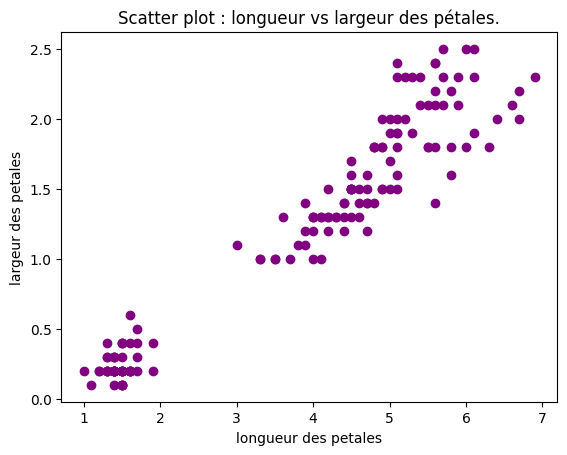

In [40]:

petal_length = features[:, 2]
petal_width = features[:, 3]
#creation du line plot
plt.scatter(petal_length, petal_width, c='purple')
plt.xlabel('longueur des petales')
plt.ylabel('largeur des petales')
plt.title('Scatter plot : longueur vs largeur des pétales.')
plt.show()

### D19. Bar chart
Bar chart des moyennes des quatre caractéristiques.


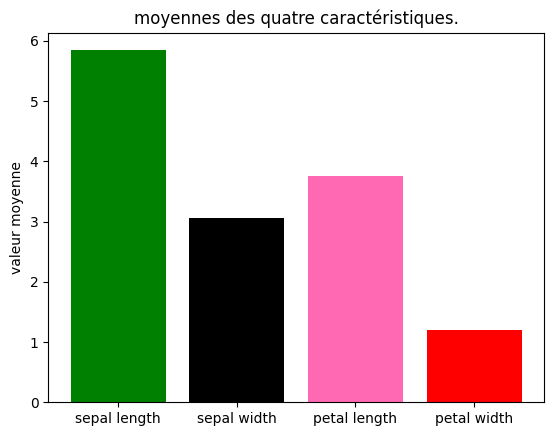

In [49]:
# Noms des caracteristiques
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
colors = np.array(['green', 'black', 'hotpink', 'red'])
# Création du bar chart
plt.bar(feature_names, mean, color=colors)
plt.ylabel('valeur moyenne')
plt.title('moyennes des quatre caractéristiques.')
plt.show()

### D20. Histogram
Histogramme de la largeur des sépales (10 bins).


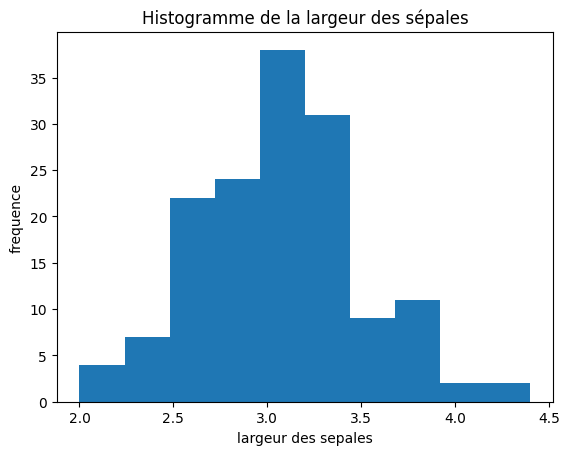

In [54]:
# Extraction de la largeur des sepales
sepal_width = features[:, 1]
#creation de l'histrogramme
plt.hist(sepal_width, bins=10)
plt.xlabel('largeur des sepales')
plt.ylabel('frequence')
plt.title('Histogramme de la largeur des sépales')
plt.show()

### D21. Boxplot par espèce
Boxplot des longueurs des pétales par espèce.


/tmp/ipython-input-3628751620.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([petal_length_setosa, petal_length_versicolor, petal_length_verginica], labels=["Setosa", "Versicolor", "Verginica"])


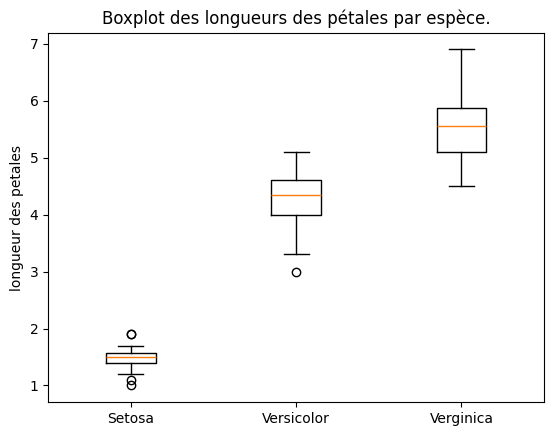

In [56]:
# Longueurs des petales par espèce
petal_length_setosa = features[:50, 2]
petal_length_versicolor = features[50:100, 2]
petal_length_verginica = features[100:150, 2]
#creation de boxplot
plt.boxplot([petal_length_setosa, petal_length_versicolor, petal_length_verginica], labels=["Setosa", "Versicolor", "Verginica"])
plt.ylabel('longueur des petales')
plt.title('Boxplot des longueurs des pétales par espèce.')
plt.show()

# Partie E — Visualisations Avancées

### E22. Subplots comparatifs
Deux scatter plots côte à côte : Setosa vs Versicolor.


In [27]:
# Votre code ici


### E23. Grille 2x2
Histogrammes des 4 caractéristiques avec `plt.subplots(2,2)`.


In [28]:
# Votre code ici


### E24. Bar chart avec error bars
Moyennes par espèce avec écart-type.


In [29]:
# Votre code ici


### E25. Scatter coloré par espèce
Scatter plot avec couleurs par espèce.


In [30]:
# Votre code ici


### E26. Line plot superposé
Cumsum des largeurs des pétales par espèce.


In [31]:
# Votre code ici


# Partie F — Mini-Analyse Finale

### F27. Corrélations
Calculez la matrice de corrélation avec `np.corrcoef`.


In [32]:
# Votre code ici


### F28. Visualisation des corrélations
Visualisez les corrélations sous forme de bar chart ou scatter.


In [33]:
# Votre code ici


### F29. Variance par espèce
Identifiez l’espèce avec la plus grande variance globale et visualisez ses distributions.


In [34]:
# Votre code ici


### F30. Conclusion
Rédigez une conclusion contenant **3 insights** issus de votre analyse.


1) ...
2) ...
3) ...